907.3181766239044 hectopascal 17.395377907482786 degree_Celsius


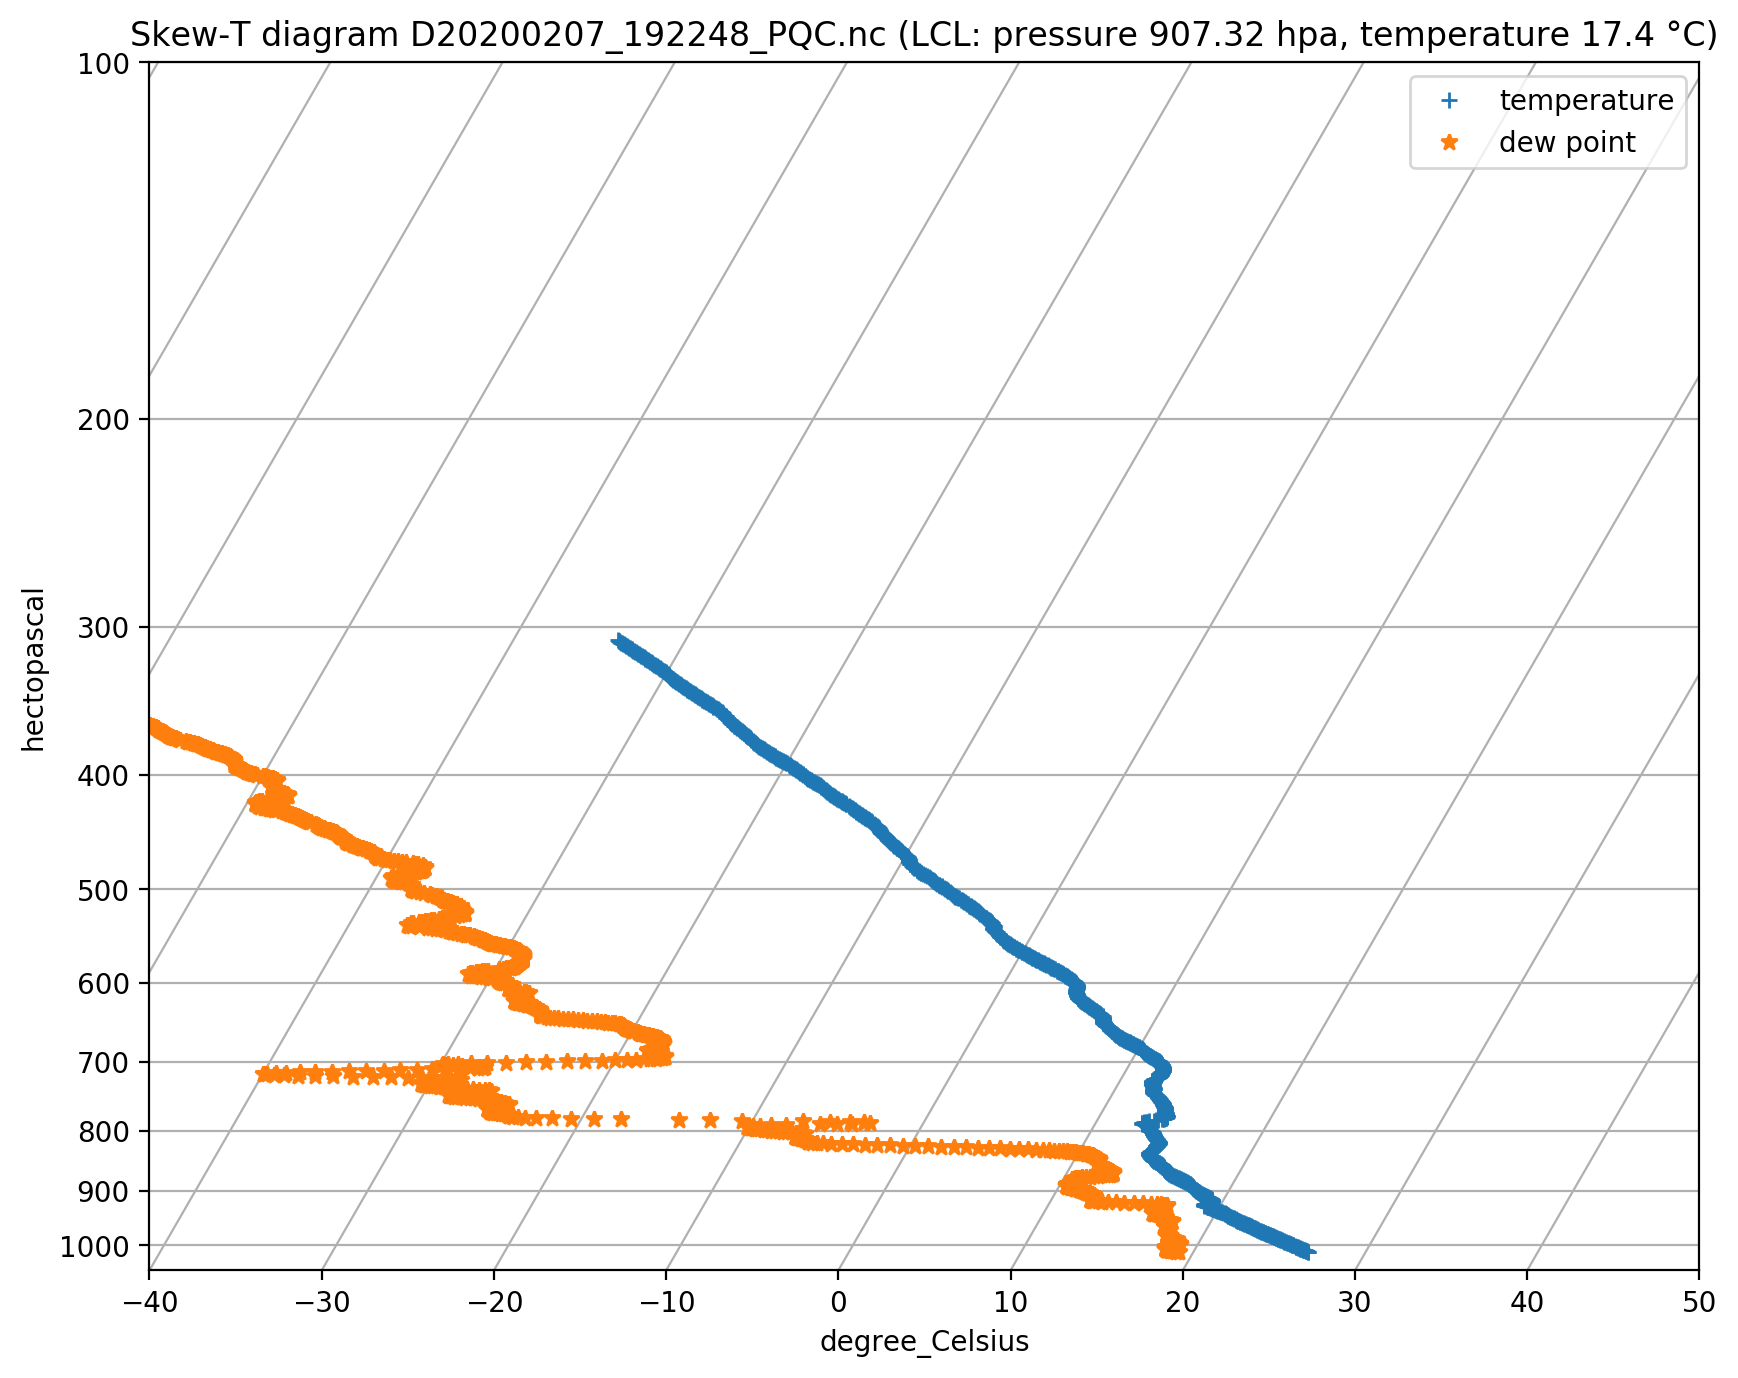

In [23]:
#D20200122_171100_PQC
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import Hodograph, SkewT
from metpy.units import units
my_example_nc_file = 'D20200207_192248_PQC.nc'
fh = Dataset(my_example_nc_file, mode='r')
#print(fh.variables.keys())
Te = fh.variables['tdry'][:]
Pr = fh.variables['pres'][:]
TD = fh.variables['dp'][:]
wid_speed = fh.variables['wspd'][:]
wid_dir = fh.variables['wdir'][:]
Rh = fh.variables['rh'][:]
P = pd.DataFrame(Pr.T)
Td= pd.DataFrame(TD.T)
T = pd.DataFrame(Te.T)
wind_speed = pd.DataFrame(wid_speed.T)
wind_dir = pd.DataFrame(wid_dir.T)
rh = pd.DataFrame(Rh.T)
df = pd.concat([P,T,Td,wind_speed,wind_dir,rh],axis = 1)
#df.drop(df.columns[[1]],axis=1,inplace=True)
df.drop(df.index[:1], inplace=True)
df.columns = ['pressure','temperature','dewpoint','speed','direction','humidity']
df.dropna(inplace = True)
df.reset_index(drop = True)
a = df.sort_values(by='pressure')
a.reset_index(drop = True,inplace=True)
df1 = a.drop(a.columns[[2, 3, 4]], axis=1) 
#df1 = a.loc[:,'pressure','temperature','humidity']
df1['temperature'] = df1.loc[:,'temperature']+273
df1.to_csv('D20200207_192248_PQC.txt', header = None, index=None, sep = ' ')
p = df['pressure'].values * units.hPa
t = df['temperature'].values * units.degC
td = df['dewpoint'].values * units.degC
wnd_spd = df['speed'].values * units.knots
wnd_dir = df['direction'].values * units.degrees
u, v = mpcalc.wind_components(wnd_spd, wnd_dir)
# Calculate the LCL
lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], t[0], td[0])
print(lcl_pressure, lcl_temperature)

#Calculate the parcel profile.
parcel_prof = mpcalc.parcel_profile(p, t[0], td[0]).to('degC')
# Create a new figure. The dimensions here give a good aspect ratio
fig = plt.figure(figsize=(10, 8),dpi=200)
skew = SkewT(fig)
# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
plt.title('Skew-T diagram D20200207_192248_PQC.nc (LCL: pressure 907.32 hpa, temperature 17.4 °C)')
skew.plot(p, t, '+', linewidth=2,label = 'temperature')
skew.plot(p, td, '*', linewidth=2,label= 'dew point')
plt.legend()
#plt.xlim([-50,50])
#skew.plot_barbs(p, u, v)
# Show the plot
plt.show()


In [4]:
def pres_alt(pressure):
    alt = 44331.5 - 4946.62 * pressure ** (0.190263)
    return alt/10000
pres_alt(927.0801169354904)
# import csv

# with open('names.csv', 'w') as csvfile:
#     fieldnames = ['#z(km)',   'LWC(g/m3)',   'R_eff(um)']
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#     writer.writeheader()
#     for i in range(10):        
#         writer.writerow({'#z(km)':'23',   'LWC(g/m3)':'72',   'R_eff(um)':'41'})
#print(fh.variables.keys())


2.6182981368586375

In [12]:
df.dropna()

,pressure,temperature,dewpoint,speed,direction
2,1010.370056,25.899107,17.553711,9.732468,70.816933
4,1009.805725,25.851139,17.498537,9.764064,72.109352
6,1009.218750,25.803293,17.446037,9.830791,72.921761
8,1008.608521,25.755682,17.398478,9.865397,73.502060
10,1007.995483,25.708340,17.355640,9.853153,73.841515
...,...,...,...,...,...
2974,306.616302,-31.471479,-41.240200,21.282358,310.167664
2976,306.239838,-31.527906,-41.297459,21.460855,310.375031
2978,305.862183,-31.580584,-41.354267,21.649477,310.598907
2980,305.483429,-31.629343,-41.409389,21.848930,310.830200


In [36]:
df

,pressure,temperature,dewpoint,speed,direction
4,1010.067139,26.346895,21.404667,8.565042,78.908936
6,1009.556519,26.284956,21.269695,8.956952,79.226570
8,1009.028748,26.223642,21.136650,9.317663,79.316254
10,1008.484253,26.163521,21.008091,9.590430,79.556023
12,1007.943542,26.104860,20.888550,9.756063,80.302773
...,...,...,...,...,...
2928,305.581573,-31.539312,-37.817772,18.043743,317.296906
2930,305.226990,-31.585609,-37.867023,18.211313,317.084991
2932,304.872437,-31.631466,-37.913223,18.373478,316.781219
2934,304.517609,-31.676907,-37.956070,18.530357,316.397552
